## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [4]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [5]:
import os

In [6]:
%pwd

'c:\\Users\\User\\Desktop\\PROJECTS\\Student-predictor\\student app\\research'

In [7]:
os.chdir("../")

#### Import the CSV Data as Pandas DataFrame

In [8]:
df = pd.read_csv('artifacts/data_ingestion/train.csv')

#### Show Top 5 Records

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,associate's degree,standard,completed,94,87,92
1,female,group E,associate's degree,standard,none,51,51,54
2,male,group C,some college,free/reduced,none,80,64,66
3,female,group E,high school,free/reduced,completed,66,74,78
4,male,group D,associate's degree,standard,none,81,71,73


#### Preparing X and Y variables

In [10]:
X = df.drop(columns=['math_score'],axis=1)

In [11]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,associate's degree,standard,completed,87,92
1,female,group E,associate's degree,standard,none,51,54
2,male,group C,some college,free/reduced,none,64,66
3,female,group E,high school,free/reduced,completed,74,78
4,male,group D,associate's degree,standard,none,71,73


In [12]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group E' 'group C' 'group D' 'group A']
Categories in'parental level of education' variable: ["associate's degree" 'some college' 'high school' "bachelor's degree"
 'some high school' "master's degree"]
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['completed' 'none']


In [13]:
y = df['math_score']

In [14]:
y

0      94
1      51
2      80
3      66
4      81
       ..
845    75
846    73
847    84
848    59
849    80
Name: math_score, Length: 850, dtype: int64

In [15]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [16]:
X = preprocessor.fit_transform(X)

In [17]:
X.shape

(850, 19)

In [18]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((680, 19), (170, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [19]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2703
- Mean Absolute Error: 4.1835
- R2 Score: 0.8741
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5386
- Mean Absolute Error: 4.5439
- R2 Score: 0.8876


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.4444
- Mean Absolute Error: 5.0421
- R2 Score: 0.8118
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.1001
- Mean Absolute Error: 5.6419
- R2 Score: 0.8153


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2669
- Mean Absolute Error: 4.1788
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5409
- Mean Absolute Error: 4.5459
- R2 Score: 0.8875


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.8874
- Mean Absolute Error: 4.6912
- R2 Score: 0.8429
-----------------------

### Results

In [21]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.887625
2,Ridge,0.887531
7,CatBoosting Regressor,0.873991
5,Random Forest Regressor,0.855518
6,XGBRegressor,0.839861
8,AdaBoost Regressor,0.837583
1,Lasso,0.815330
3,K-Neighbors Regressor,0.802604
4,Decision Tree,0.673042


## Linear Regression

In [22]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.76


## Plot y_pred and y_test

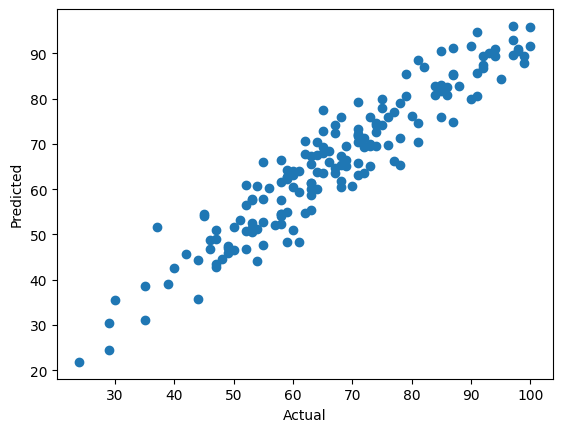

In [23]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

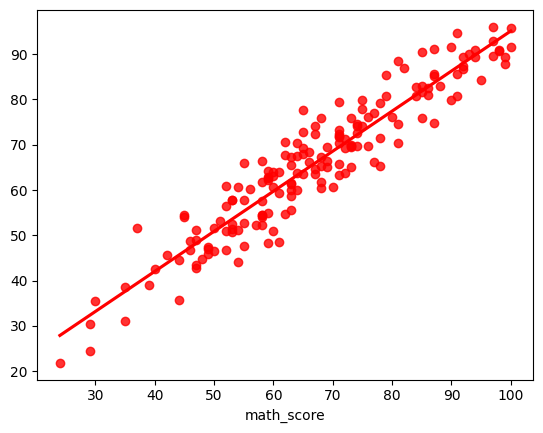

In [24]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [25]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
512,71,63.21875,7.78125
357,69,66.37500,2.62500
110,52,50.84375,1.15625
684,68,75.87500,-7.87500
39,88,82.87500,5.12500
...,...,...,...
296,55,52.65625,2.34375
155,54,44.06250,9.93750
326,67,64.71875,2.28125
101,97,96.06250,0.93750
